In [1]:
# Cargar librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# **Lectura de datos**

In [2]:
# Lectura de datos

df_original = pd.read_csv('https://raw.githubusercontent.com/SantiRestrepoOlarte/Trabajo_analitica_2/main/ecommerce-data.csv', na_values='?')
df_original.head()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Creación de copia datos
df=df_original.copy()

# **Análisis exploratorio**

In [4]:
# Dimensión del dataset
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## **Datos faltantes**

In [7]:
# Datos faltantes
df.isnull().sum()

Reviews                    0
Reviews_Duration           0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Purchase                   0
dtype: int64

El dataset **no** posee datos faltantes

## Exploración de variables

In [8]:
df.head()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
# Descripción variables númericas
df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Reviews,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Reviews_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Matriz de correlación dataset inicial

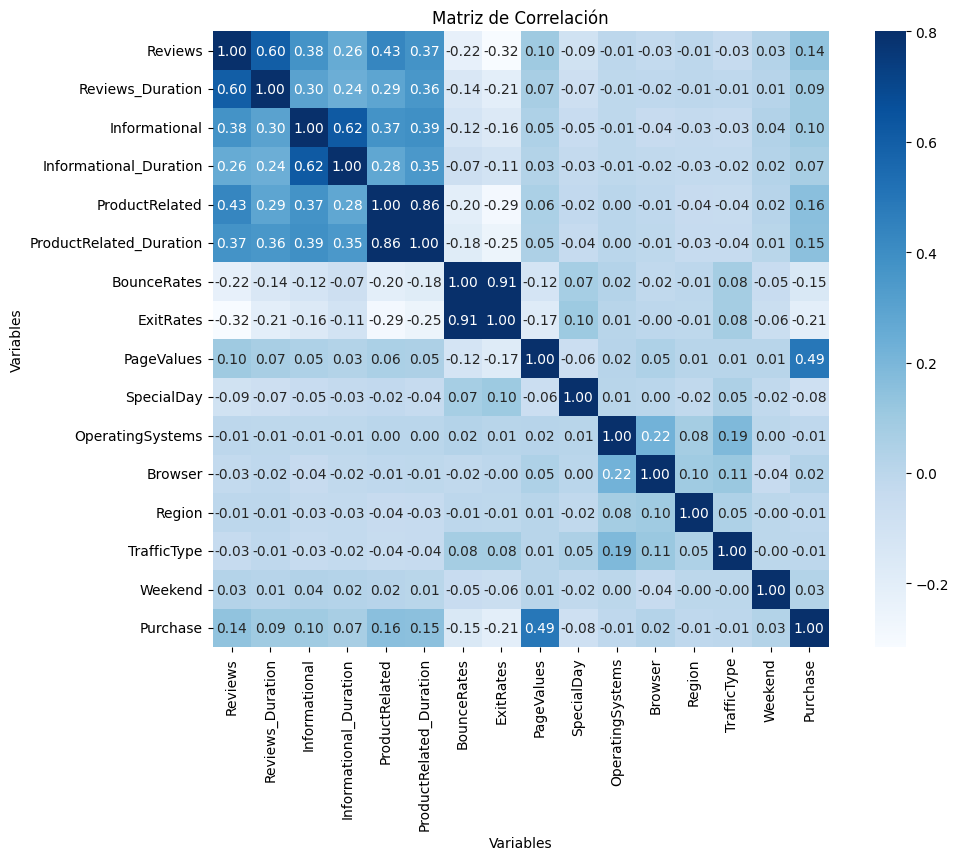

In [15]:
# Matriz de correlación

# Seleccionar columnas numéricas
columnas_numericas = [col for col in df.columns if df[col].dtype != 'object']

# Filtrar DataFrame a las variables numéricas
df_numerico = df[columnas_numericas]

# Calcular la matriz de correlación
corrmat = df_numerico.corr()

# Configurar tamaño de la figura
f, ax = plt.subplots(figsize=(12, 8))

# Mostrar la matriz de correlación como mapa de calor
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, annot_kws={"fontsize": 10}, fmt=".2f", cmap='Blues')

# Agregar título y etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar la figura
plt.show()

De la matriz de correlación se pueden extraer algunas consideraciones:
- La varibale 'ProductRelated' posee una alta correlación con la variable 'ProductRelated_Duration', por ende se podría analizar si se pueden eliminar las dos o alguna de ellas para evitar problemas de multicolinealidad.
- La variable 'BounceRates' presenta alta correlación con 'ExitRates', por ende se podría realizar el mismo análisis mencionado anteriormente.
- Sucede un caso parecido a los anteriores entre la variable 'Reviews' y 'Reviews_Duration' y entre 'Informational' e 'Informational_Duration' aunque con una correlación menor que en los casos anteriores.
- Por otra parte, la variable 'Pagevalues' presenta una correlación considerable (en comparación con las otras) con la variable objetivo 'Purchase'

Dicho todo esto, más adelante se procede a realizar análisis univariado y bivariado para determinar otros hallazgos y seleccionar las variables que serán eliminadas.

In [ ]:
# Columna 'Reviews'
df['Reviews'].describe()
df['Reviews'].unique()
df['Reviews'].nunique()
df['Reviews'].value_counts()

In [ ]:
# Columna 'Reviews_Duration'
df['Reviews_Duration'].describe()
#df['Reviews_Duration'].unique()
#df['Reviews_Duration'].nunique()
df['Reviews_Duration'].value_counts()

La variable ***'Reviews_Duration'*** posee la gran mayoría de los datos con valor 0, por ende se puede afirmar que la variable no aportaría información valiosa para los modelos a montar. Dicho esto, esta variable puede ser candidata a ser eliminada del dataset.

In [ ]:
# Columna 'Informational'
#df['Informational'].describe()
#df['Informational'].unique()
#df['Informational'].nunique()
df['Informational'].value_counts()

La variable ***'Informational'*** presenta un comportamiento parecido a la anterior dado que posee gran parte de valores como 0. Por ende, también podría ser eliminada del dataset

In [35]:
# Columna 'Informational_Duration'
#df['Informational_Duration'].describe()
#df['Informational_Duration'].unique()
#df['Informational_Duration'].nunique()
df['Informational_Duration'].value_counts()

Informational_Duration
0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: count, Length: 1258, dtype: int64

Nuevamente, la variable ***'Informational_Duration'*** es candidata a ser eliminada del dataset por su gran cantidad de valores 0.

In [ ]:
# Columna 'ProductRelated'
df['ProductRelated'].describe()
df['ProductRelated'].unique()
df['ProductRelated'].nunique()
df['ProductRelated'].value_counts()

In [34]:
# Columna 'ProductRelated_Duration'
df['ProductRelated_Duration'].describe()
df['ProductRelated_Duration'].unique()
df['ProductRelated_Duration'].nunique()
df['ProductRelated_Duration'].value_counts()

ProductRelated_Duration
0.000000      755
17.000000      21
11.000000      17
8.000000       17
15.000000      16
             ... 
964.070513      1
593.507143      1
831.388889      1
922.208333      1
346.000000      1
Name: count, Length: 9551, dtype: int64

La variable ***'ProductRelated_Duration'*** también es candidata a ser eliminada dada la gran cantidad de datos con valor 0 con los que cuenta.

In [10]:
# Columna 'BounceRates'
df['BounceRates'].describe()
df['BounceRates'].unique()
#df['BounceRates'].nunique()
df['BounceRates'].value_counts()

BounceRates
0.000000    5518
0.200000     700
0.066667     134
0.028571     115
0.050000     113
            ... 
0.079279       1
0.006723       1
0.013527       1
0.074419       1
0.011149       1
Name: count, Length: 1872, dtype: int64

La variable ***'BounceRates'*** presenta un comportamiento similar

In [ ]:
# Columna 'ExitRates'
df['ExitRates'].describe()
#df['ExitRates'].unique()
#df['ExitRates'].nunique()
df['ExitRates'].value_counts()

In [11]:
# Columna 'PageValues'
df['PageValues'].describe()
df['PageValues'].unique()
df['PageValues'].nunique()
df['PageValues'].value_counts()

PageValues
0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: count, Length: 2704, dtype: int64

La variable ***'PageValues'*** cuenta con más del 80% de sus observaciones como 0, sin embargo se debe realizar un análisis un poco más cuidadoso dado que esta variable presenta una correlación considerable con la variable objetivo

In [ ]:
# Columna 'SpecialDay'
df['SpecialDay'].describe()
df['SpecialDay'].unique()
df['SpecialDay'].nunique()
df['SpecialDay'].value_counts()

A pesar de que la variable ***'SpecialDay'*** presenta gran parte de sus valores con valor 0 pues no se decide eliminar por tal razón dada la naturaleza y significado de la variable. Todo esto, dado que un valor 0 acá puede contener información valiosa, al igual que los demás valores de la variable.

In [ ]:
# Columna 'Month'
df['Month'].describe()
df['Month'].unique()
df['Month'].nunique()
df['Month'].value_counts()

La columna ***'Month'*** posee la particularidad de que no cuenta con observaciones del mes de enero ni abril.

In [ ]:
# Columna 'OperatingSystems'
df['OperatingSystems'].describe()
df['OperatingSystems'].unique()
df['OperatingSystems'].nunique()
df['OperatingSystems'].value_counts()

In [ ]:
# Columna 'Browser'
df['Browser'].describe()
df['Browser'].unique()
df['Browser'].nunique()
df['Browser'].value_counts()

In [ ]:
# Columna 'Region'
df['Region'].describe()
#df['Region'].unique()
df['Region'].nunique()
df['Region'].value_counts()

In [ ]:
# Columna 'TrafficType'
df['TrafficType'].describe()
df['TrafficType'].unique()
df['TrafficType'].nunique()
df['TrafficType'].value_counts()

In [ ]:
# Columna 'VisitorType'
#df['VisitorType'].describe()
df['VisitorType'].unique()
#df['VisitorType'].nunique()
df['VisitorType'].value_counts()

In [ ]:
# Columna 'Weekend'
df['Weekend'].describe()
#df['Weekend'].unique()
#df['Weekend'].nunique()
df['Weekend'].value_counts()

In [7]:
# Columna 'Purchase' (VARIABLE OBJETIVO)
df['Purchase'].describe()
df['Purchase'].unique()
df['Purchase'].nunique()
df['Purchase'].value_counts()

Purchase
False    10422
True      1908
Name: count, dtype: int64

In [38]:
total=10422+1908
total1=1908/total
total0=10422/total

total1,total0

# Variable objetivo desbalanceada
# 84.52% es 0 (no compra)
# 15.48% es 1 (compra)

(0.15474452554744525, 0.8452554744525548)

[Text(0, 0, '0'), Text(1, 0, '1')]

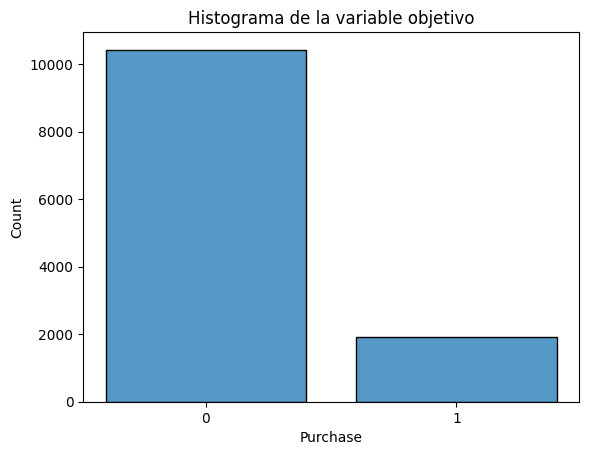

In [37]:
ax = sns.histplot(data=df, x='Purchase', bins=[0, 0.5, 1.5], discrete=True, shrink=0.8)

plt.xlabel('Purchase')
plt.ylabel('Count')
plt.title('Histograma de la variable objetivo')

ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])

En cuanto a la variable objetivo ***'Purchase'*** se concluye que posee una distribución desbalanceada dado que apróximadamente el 85% de las observaciones son clasificadas como 0 y el 15% restante como 1. 

Además, dada la distribución de las variables ***'SpecialDay'***, ***'OperatingSystems'***, ***'Browser'***, ***'Region'*** y ***'TrafficType'*** se podrían tratar como variables categóricas cambiando su tipología a 'object'. Además, las variables ***'Month'***, ***'VisitorType'*** y ***'Weekend'*** se mantienen tal cual.

# **Datos duplicados**

In [12]:
duplicados=df.duplicated()
df[duplicados]

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


El dataset posee 125 observaciones duplicadas, las cuales se proceden a eliminar

In [13]:
# Eliminación de datos duplicados
df=df.drop_duplicates()

In [14]:
# Comprobación datos duplicados
duplicados=df.duplicated()
df[duplicados]

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase


### **Análisis univariado**

In [11]:
# Definición de variables para graficar
variables = ['Reviews', 'Reviews_Duration', 'Informational','Informational_Duration']
variables2 = ['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']
variables3 = ['PageValues', 'SpecialDay', 'OperatingSystems']
variables4 = ['Browser', 'Region', 'TrafficType']

In [12]:
# Funciones paea gráficos de caja para las variables numéricas

def graficar_boxplots_3(df, variables):
  # Seleccionar las variables
  df_subset = df[variables]

  # Graficar boxplots
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))
  for i, variable in enumerate(variables):
    sns.boxplot(data=df_subset[variable], ax=axes[i])
    axes[i].set_title(variable)

  # Ajustar la figura
  plt.tight_layout()
  plt.show()

def graficar_boxplots_4(df, variables):
  # Seleccionar las variables
  df_subset = df[variables]

  # Graficar boxplots
  fig, axes = plt.subplots(1, 4, figsize=(15, 5))
  for i, variable in enumerate(variables):
    sns.boxplot(data=df_subset[variable], ax=axes[i])
    axes[i].set_title(variable)

  # Ajustar la figura
  plt.tight_layout()
  plt.show()

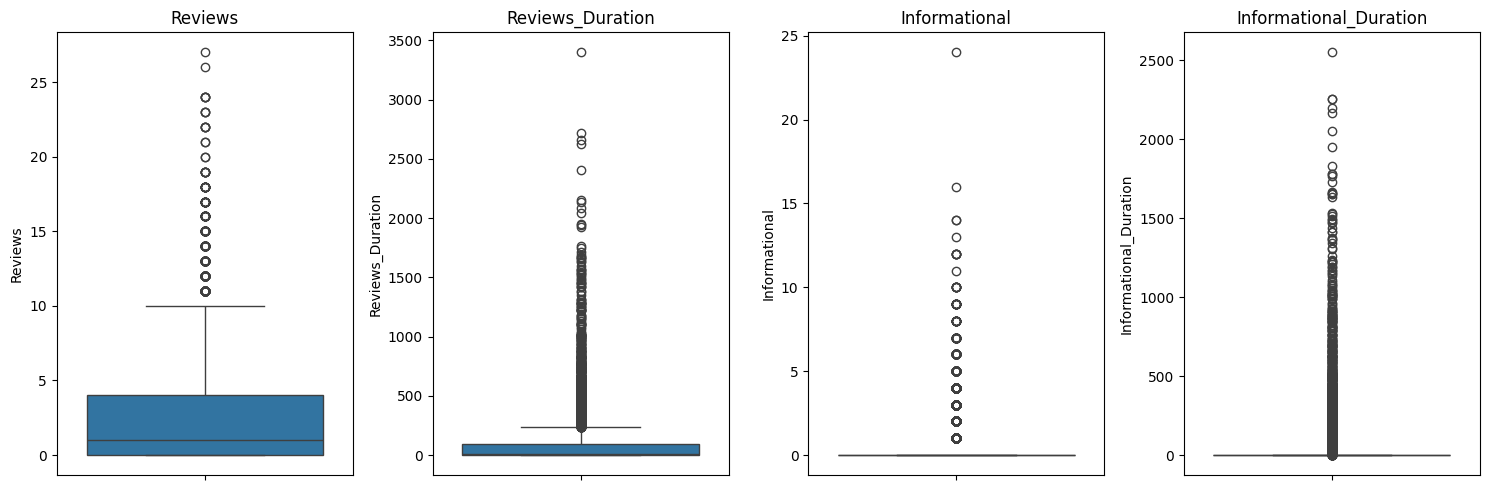

In [13]:
graficar_boxplots_4(df, variables)

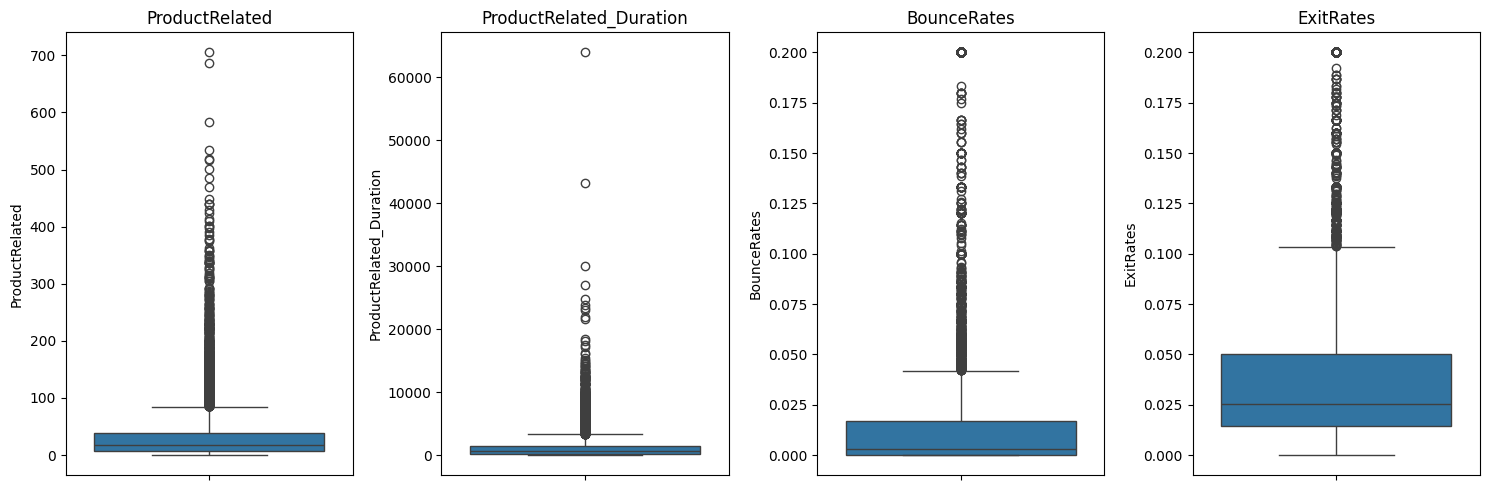

In [43]:
graficar_boxplots_4(df, variables2)

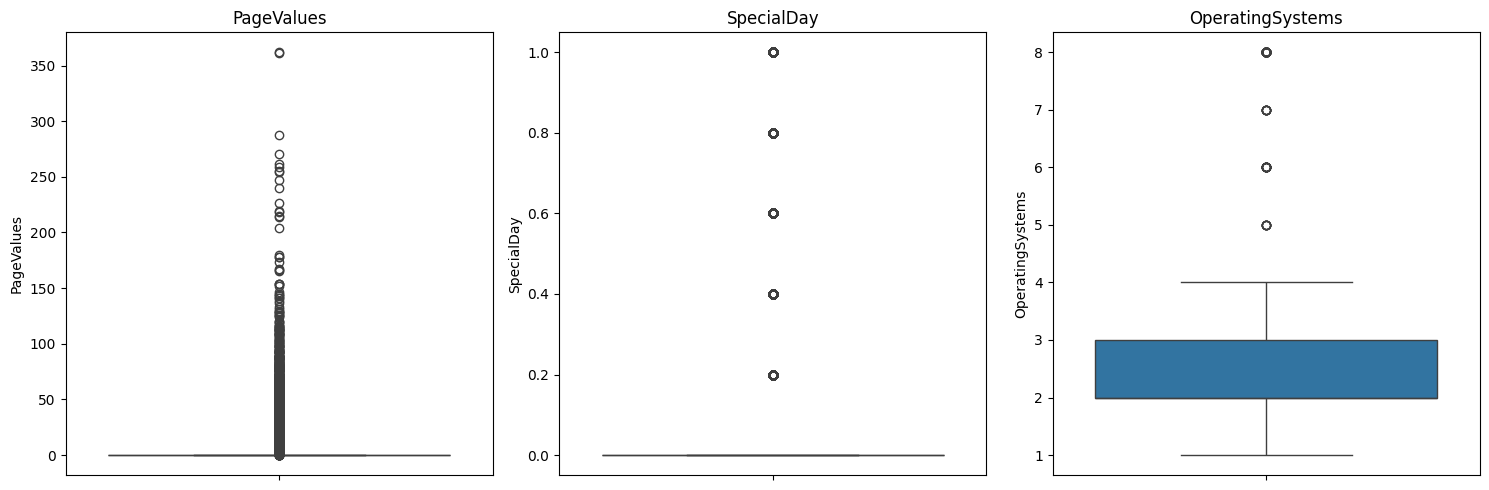

In [11]:
graficar_boxplots_3(df,variables3)

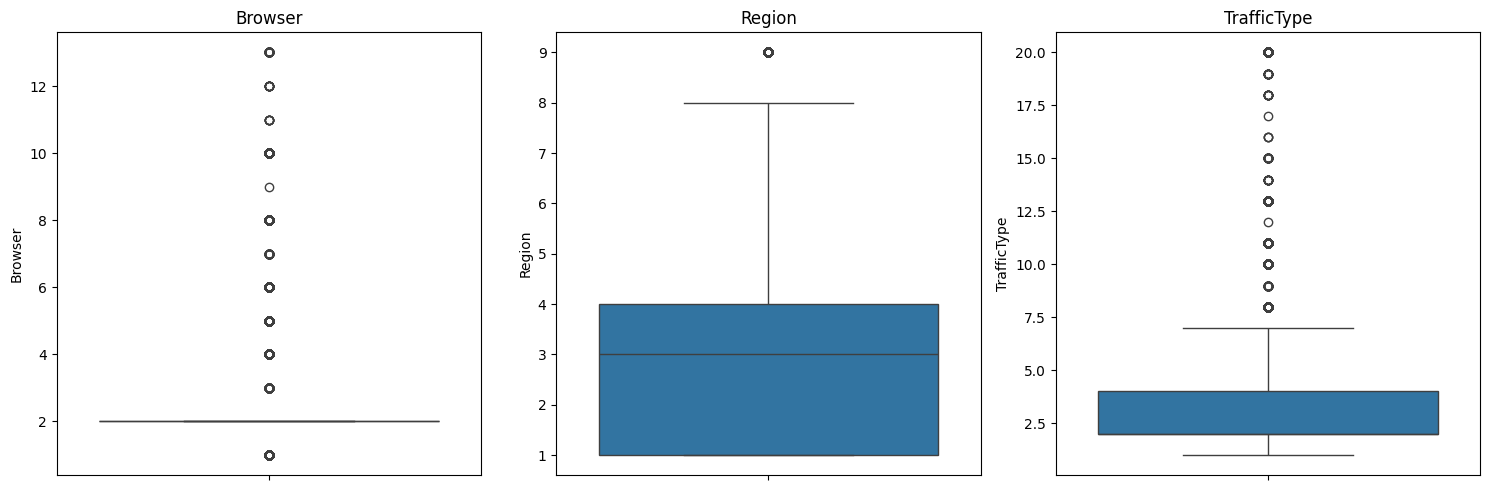

In [12]:
graficar_boxplots_3(df,variables4)

De los boxplots se evidencia la presencia de una gran cantidad de datos atípicos en la mayoría de variables númericas por lo que es necesario un tratamiento de las variables para realizar una limpieza del dataset.

### **Análisis bivariado**

In [20]:
df.columns

Index(['Reviews', 'Reviews_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Purchase'],
      dtype='object')

<Axes: xlabel='Purchase', ylabel='Reviews'>

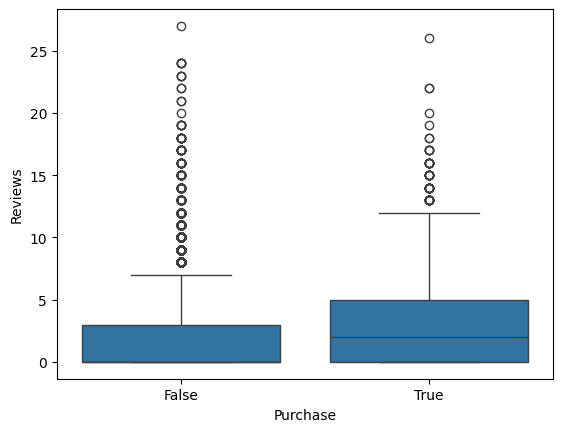

In [44]:
# Reviews con Purchase

# Seleccionar variables
variable_numerica = df['Reviews']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

<Axes: xlabel='Purchase', ylabel='Reviews_Duration'>

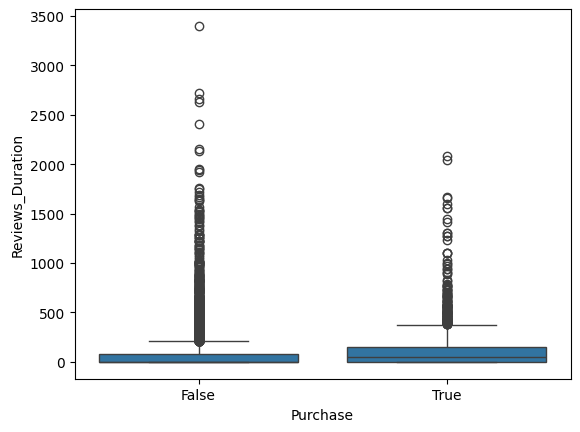

In [45]:
# Reviews_Duration con Purchase

# Seleccionar variables
variable_numerica = df['Reviews_Duration']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

La variable ***'Reviews_Duration'*** no parece mostrar una varianza considerable de la variable objetivo ***'Purchase'***, por ende no generaría problemas la eliminación de esta variable. 

<Axes: xlabel='Purchase', ylabel='Informational'>

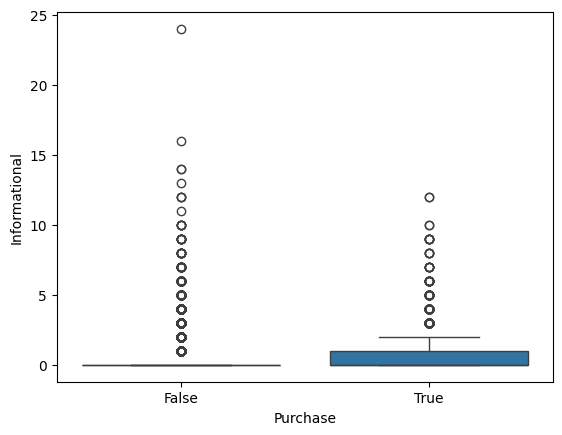

In [46]:
# Informational con Purchase

# Seleccionar variables
variable_numerica = df['Informational']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

<Axes: xlabel='Purchase', ylabel='Informational_Duration'>

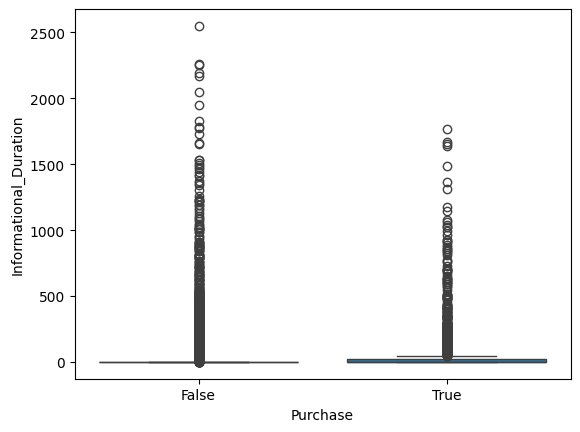

In [47]:
# Informational_Duration con Purchase

# Seleccionar variables
variable_numerica = df['Informational_Duration']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

Tanto la variable ***'Informational'*** como ***'Informational_Duration'*** presentan un comportamiento similar en el cual sus valores no arrojan información tan relevante, y además la gran cantidad de datos atípicos no permite concluir de forma clara.

<Axes: xlabel='Purchase', ylabel='ProductRelated'>

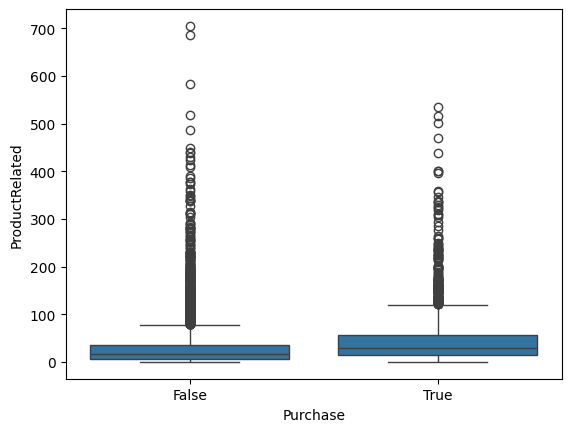

In [48]:
# ProductRelated con Purchase

# Seleccionar variables
variable_numerica = df['ProductRelated']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

<Axes: xlabel='Purchase', ylabel='ProductRelated_Duration'>

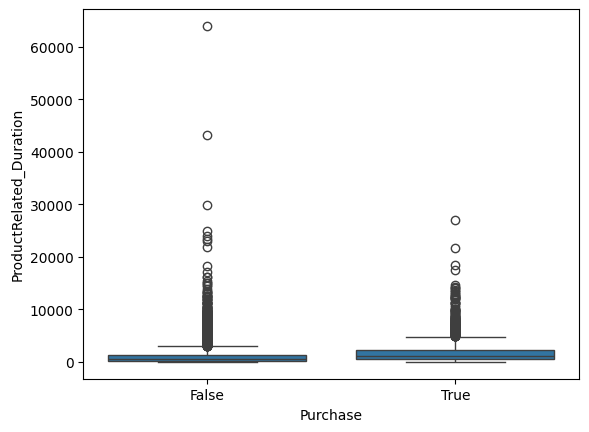

In [49]:
# ProductRelated_Duration con Purchase

# Seleccionar variables
variable_numerica = df['ProductRelated_Duration']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

Dado que las variables independientes ***'ProductRelated'*** y ***'ProductRelated_Duration'*** poseen una correlación alta entre ellas, se decide descartar la variable ***'ProductRelated_Duration'*** dado que parece ser la variable que menos aporta o explica al modelo.

<Axes: xlabel='Purchase', ylabel='BounceRates'>

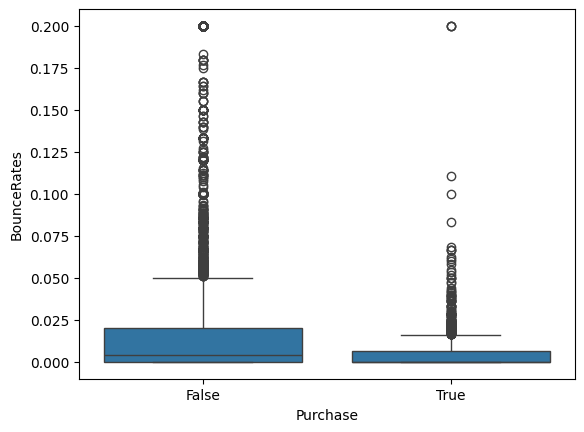

In [50]:
# BounceRates con Purchase

# Seleccionar variables
variable_numerica = df['BounceRates']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

<Axes: xlabel='Purchase', ylabel='ExitRates'>

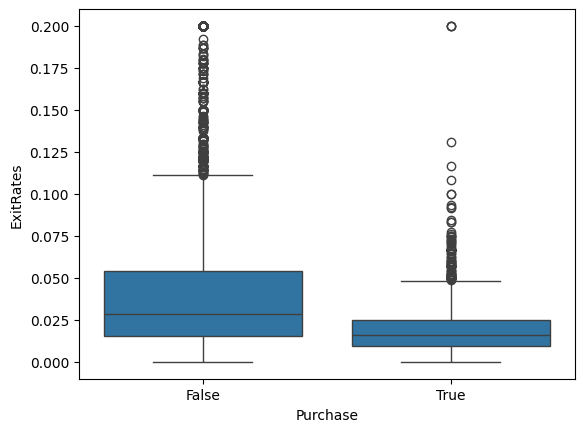

In [51]:
# ExitRates con Purchase

# Seleccionar variables
variable_numerica = df['ExitRates']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

Como con las variables ***'BounceRates'*** y ***'ExitRates'*** se presenta una situación similar a la anterior (correlación entre ellas) se decide eliminar ***'BounceRates'*** dado que es la que menos explica.

<Axes: xlabel='Purchase', ylabel='PageValues'>

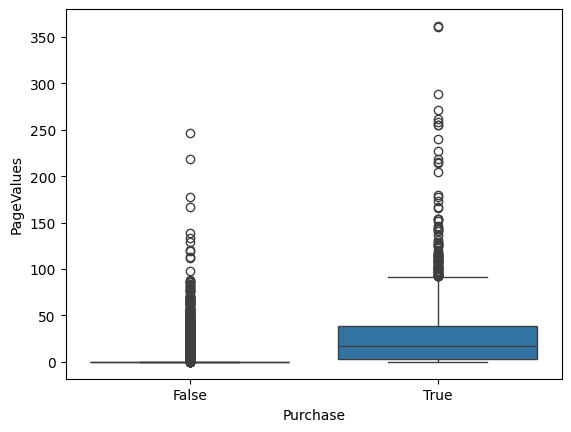

In [52]:
# PageValues con Purchase

# Seleccionar variables
variable_numerica = df['PageValues']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

In [42]:
df_agrupado = df.groupby('Purchase')['PageValues'].mean()
df_agrupado

Purchase
False     1.999985
True     27.264518
Name: PageValues, dtype: float64

La variable ***'PageValues'*** presenta una gran cantidad de atípicos en ambas clases, sin embargo, esta variable si parece ser útil para explicar la varibailidad de la variable respuesta dado que los que son False tienen la media en 2 y los que son True tienen su media en 27.26. Dicho esto, se recomienda realizar algún procedimiento que permita mantener la variable pero hacerla menos susceptible a los datos atípicos.





<Axes: xlabel='Purchase', ylabel='OperatingSystems'>

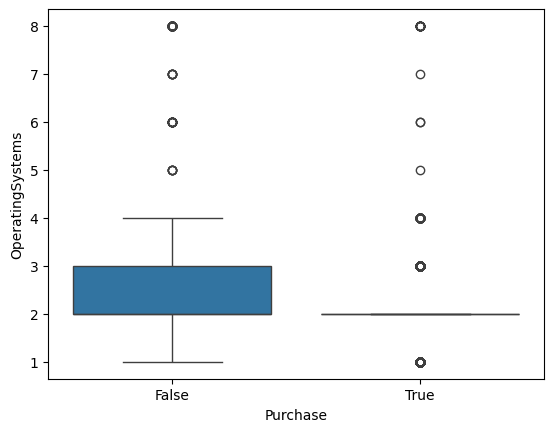

In [60]:
# OperatingSystems con Purchase

# Seleccionar variables
variable_numerica = df['OperatingSystems']
variable_objetivo = df['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

# **Tratamiento de datos atípicos**

### Eliminación de variables que no aportan

Como se mencionó en el análisis exploratorio se va a realizar la eliminación de las variables ***'Informational'***, ***'Informational_Duration'***, ***'ProductRelated_Duration'***, ***'Reviews_Duration'*** y ***'BounceRates'***

In [15]:
# Eliminación de la columna 'Informational'
df = df.drop('Informational', axis=1)

# Eliminación de la columna 'Informational_Duration'
df = df.drop('Informational_Duration', axis=1)

# Eliminación de la columna 'Reviews_Duration'
df = df.drop('Reviews_Duration', axis=1)

# Eliminación de la columna 'BounceRates'
df = df.drop('BounceRates', axis=1)

# Eliminación de la columna 'ProductRelated_Duration'
df = df.drop('ProductRelated_Duration', axis=1)

### Tratamiento

In [16]:
df_agrupado = df.groupby('Purchase')['PageValues'].mean()
df_agrupado

Purchase
False     1.999985
True     27.264518
Name: PageValues, dtype: float64

En el caso especial de la variable ***'PageValues'*** se realizará un procedimiento diferente a recomendación de un experto. Dado que la variable presenta datos entre 0 y 321 aproximadamente, la columna será modificada de forma que si el valor es menor que 20 se reemplace por 0 y si el valor es mayor o igual que 20 se reemplace por 1.

*Nota: se escoge el valor de 20 como límite dado que el groupby entre la variable *Purchase* y *PageValues* entrega como media de los True el valor de 27.26 entonces se considera un valor adecuado para su partición*

In [17]:
# Reemplazo de valores en la columna 'PageValues'

valor_base = df['PageValues'] >= 20

df['PageValues'] = df['PageValues'].mask(valor_base, 1)

In [18]:
df.sample()

,Reviews,ProductRelated,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
661,2,15,0.04375,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False


In [19]:
# Renombramiento de la columna 'PageValues'

df.rename(columns={'PageValues': 'PageValues>=20'}, inplace=True)

In [14]:
df.head(3)

,Reviews,ProductRelated,ExitRates,PageValues>=20,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,1,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,2,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,1,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


Ahora, para las variables númericas que se conservan se decide eliminar las observaciones que se encuentren por encima del límite superior del tercer cuartil utilizando un multiplicador de 2.2 y no de 1.5, de modo que al ejecutar el procedimiento no elimine tantas observaciones.

In [20]:
def eliminar_atipicos_cuartil(df, columna):
    # Calcular el límite superior del cuarto cuartil
    q3 = df[columna].quantile(0.75)
    # Calcular el rango intercuartílico
    iqr = df[columna].quantile(0.75) - df[columna].quantile(0.25)
    # Calcular el límite superior de los valores no atípicos
    limite_superior = q3 + 2.2 * iqr
    # Filtrar el DataFrame para excluir valores atípicos
    df_sin_atipicos = df.loc[df[columna] <= limite_superior]
    
    return df_sin_atipicos

In [21]:
df_sin_atipicos = eliminar_atipicos_cuartil(df, 'Reviews')
df_sin_atipicos = eliminar_atipicos_cuartil(df_sin_atipicos, 'ProductRelated')
df_sin_atipicos = eliminar_atipicos_cuartil(df_sin_atipicos, 'ExitRates')

In [22]:
df_sin_atipicos

,Reviews,ProductRelated,ExitRates,PageValues>=20,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
1,0,2,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
4,0,10,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,19,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0,2,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,3,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,53,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,5,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,6,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,15,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Una vez eliminadas las variables que no aportan información y haber realizado el tratamiento de datos atípicos, el dataframe resultante posee 10570 observaciones y un total de 13 columnas, lo que permite apreciar que una vez realizado el preprocesamiento del dataset se eliminan un poco menos del 15% de las observaciones y se eliminan 5 columnas. Ahora, se procede a graficar los boxplots de las variables númericas para evidenciar el comportamiento con el nuevo dataset.

### Boxplots después de tratar datos atípicos

In [35]:
variables_atip = ['Reviews', 'ProductRelated']
variables2_atip = ['ExitRates', 'SpecialDay', 'OperatingSystems']
variables3_atip = ['Browser', 'Region', 'TrafficType']

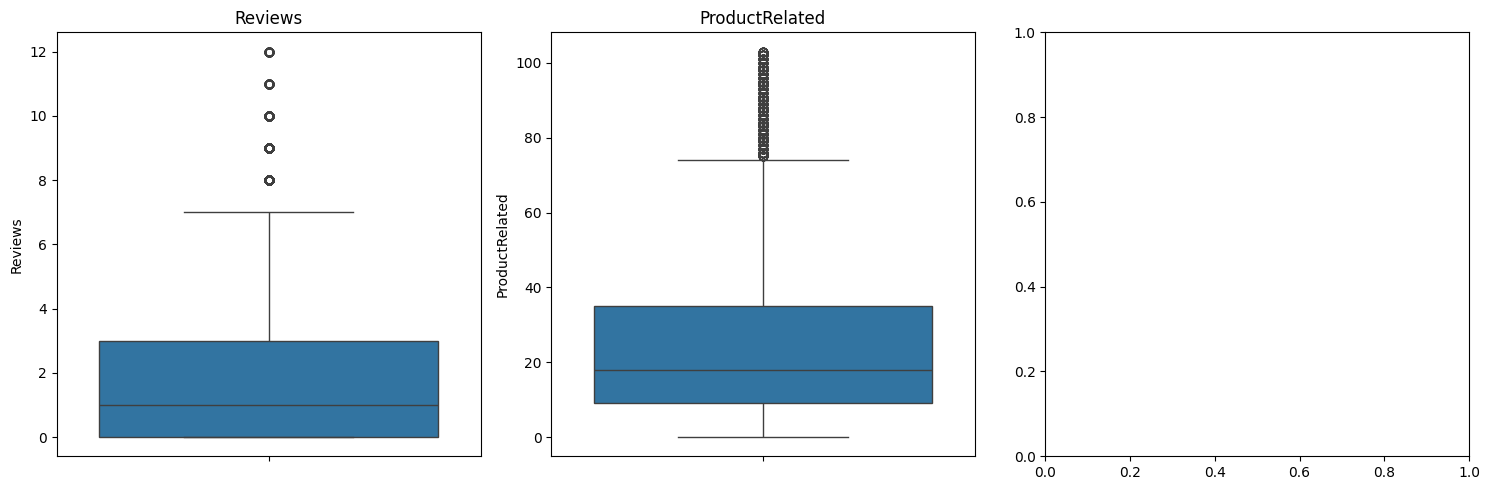

In [36]:
graficar_boxplots_3(df_sin_atipicos, variables_atip)

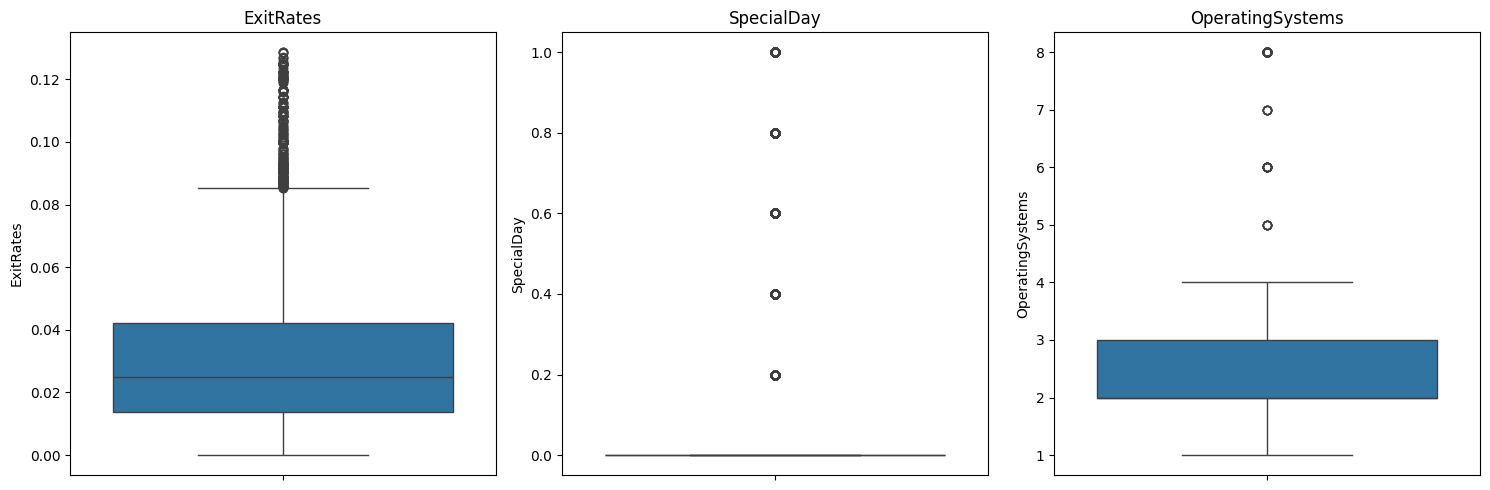

In [37]:
graficar_boxplots_3(df_sin_atipicos, variables2_atip)

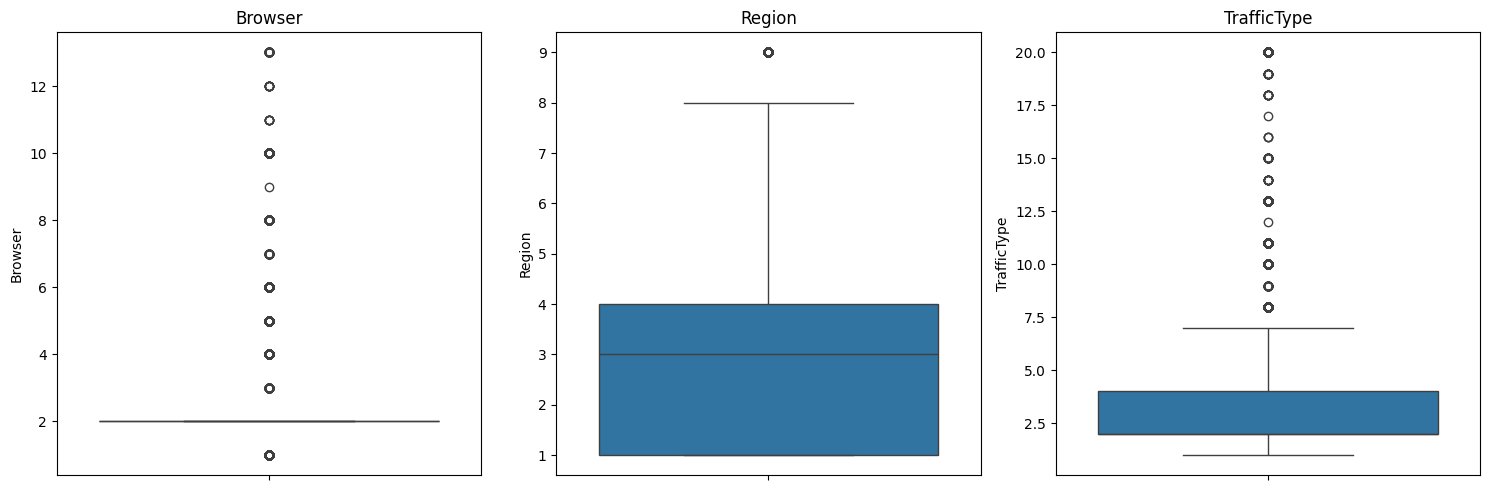

In [38]:
graficar_boxplots_3(df_sin_atipicos, variables3_atip)

<Axes: xlabel='Purchase', ylabel='PageValues>=20'>

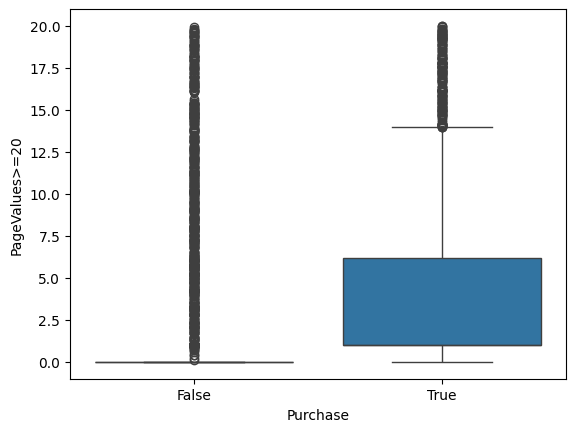

In [43]:
# PageValues con Purchase

# Seleccionar variables
variable_numerica = df_sin_atipicos['PageValues>=20']
variable_objetivo = df_sin_atipicos['Purchase']

# Visualización
sns.boxplot(x=variable_objetivo, y=variable_numerica, data=df)

Una vez vistos los boxplots después de realizar el preprocesamiento se sigue evidenciando presencia de datos atípicos pero no tan problemáticos como inicialmente se visualizaron. Además, como se mencionó anteriormente, no es posible realizar la eliminación de más datos atípicos dado que eso generaría una eliminación de un número muy elevado de observaciones lo que reduciría enormemente el tamaño del dataset.

# **Transformación de variables**

Además, para las variables ***'Weekend'*** y ***'Purchase'*** que están en tipo booleano como True and False se transforman a tipo binaria con valores 1 (True) y 0 (False) 

In [23]:
# Variable 'Weekend' y la variable objetivo 'Purchase'
week_var = {
    False: 0,
    True: 1
}

df_sin_atipicos['Weekend'] = df_sin_atipicos['Weekend'].replace(week_var)
df_sin_atipicos['Purchase'] = df_sin_atipicos['Purchase'].replace(week_var)


Se cambia el tipo de la variable ***''PageValues>=20''*** de float a int.

In [24]:
# Variable 'PageValues>=20' como int
df_sin_atipicos['PageValues>=20'] = df_sin_atipicos['PageValues>=20'].astype('int64') 

In [25]:
df_sin_atipicos.head(3)

,Reviews,ProductRelated,ExitRates,PageValues>=20,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
1,0,2,0.100000,0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
4,0,10,0.050000,0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
5,0,19,0.024561,0,0.0,Feb,2,2,1,3,Returning_Visitor,0,0


In [26]:
# Categorizarización de variables

variables_numericas = ['SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType']

for variable in variables_numericas:
  df_sin_atipicos[variable] = df_sin_atipicos[variable].astype('object') 

In [27]:
df_sin_atipicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10570 entries, 1 to 12329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Reviews           10570 non-null  int64  
 1   ProductRelated    10570 non-null  int64  
 2   ExitRates         10570 non-null  float64
 3   PageValues>=20    10570 non-null  int64  
 4   SpecialDay        10570 non-null  object 
 5   Month             10570 non-null  object 
 6   OperatingSystems  10570 non-null  object 
 7   Browser           10570 non-null  object 
 8   Region            10570 non-null  object 
 9   TrafficType       10570 non-null  object 
 10  VisitorType       10570 non-null  object 
 11  Weekend           10570 non-null  int64  
 12  Purchase          10570 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


### Matriz de correlación después del preprocesamiento de datos

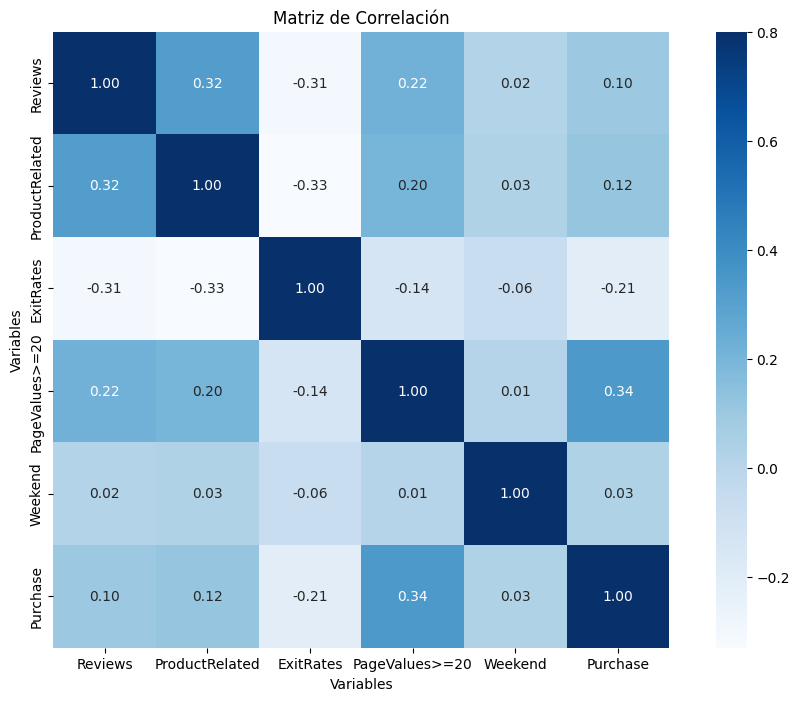

In [51]:
# Matriz de correlación

# Seleccionar columnas numéricas
columnas_numericas = [col for col in df_sin_atipicos.columns if df_sin_atipicos[col].dtype != 'object']

# Filtrar DataFrame a las variables numéricas
df_numerico = df_sin_atipicos[columnas_numericas]

# Calcular la matriz de correlación
corrmat = df_numerico.corr()

# Configurar tamaño de la figura
f, ax = plt.subplots(figsize=(12, 8))

# Mostrar la matriz de correlación como mapa de calor
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, annot_kws={"fontsize": 10}, fmt=".2f", cmap='Blues')

# Agregar título y etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar la figura
plt.show()


Finalmente, se realiza la matriz de correlación una vez realizado el preprocesamiento de los datos de la cual se puede concluir que se solucionó el tema de correlaciones enormemente al eliminar algunas varibales y al tratar los datos atípicos de otras. Así mismo, se percibe cierta correlación entre la variable ***'Reviews'*** y ***'ProductRelated'*** que se decide mantener dado que no se eliminarán más variables, y también, cierta correlación por parte de la variable ***'PageValues>=20'*** con la variable objetivo.

Ahora, se realiza la descarga el conjunto de datos resultantes del preprocesamiento que servirán como insumo para la selección de características y el montaje de los modelos de Aprendizaje Supervisado que se ejecutan en notebooks posteriores. Dicho conjunto de datos se encontrará disponible en el repositorio de GitHub del proyecto: https://github.com/SantiRestrepoOlarte/Trabajo_analitica_2.git

In [48]:
df_sin_atipicos.head()

,Reviews,ProductRelated,ExitRates,PageValues>=20,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
1,0,2,0.100000,0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
4,0,10,0.050000,0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
5,0,19,0.024561,0,0.0,Feb,2,2,1,3,Returning_Visitor,0,0
8,0,2,0.100000,0,0.8,Feb,2,2,2,3,Returning_Visitor,0,0
9,0,3,0.022222,0,0.4,Feb,2,4,1,2,Returning_Visitor,0,0


In [49]:
df_sin_atipicos.shape

(10570, 13)

In [50]:
#df_sin_atipicos.to_csv('C:/Users/srest/Desktop/Universidad/Analitica2/Trabajo_analitica_2/preprocessing_data.csv', index=False)

# **Procedimiento para la escongencia del conjunto de datos con selección de características**

## **Selección de características**

Antes de realizar la selección de características se procede a conseguir el dataset en formato dummy y posteriormente el escalado de los datos

### Formato dummies

In [27]:
df_dummies = pd.get_dummies(df_sin_atipicos)

In [28]:
df_dummies.head()

,Reviews,ProductRelated,ExitRates,PageValues>=20,Weekend,Purchase,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
1,0,2,0.100000,0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,10,0.050000,0,1,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,0,19,0.024561,0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,0,2,0.100000,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,0,3,0.022222,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


### Escalado de los datos

In [29]:
# Separación de caracteristicas y target (X , y)
y = df_dummies['Purchase']
X = df_dummies.drop(['Purchase'], axis=1)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:",  X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes(exclude='object').columns)

#Estandarización de variables númericas
pipeline = ColumnTransformer([('num',MinMaxScaler() , numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (8456, 74)
Tamaño del conjunto de validación: (2114, 74)


In [30]:
X_train_std = pd.DataFrame(X_train_std,columns=X.columns)
X_test_std = pd.DataFrame(X_test_std,columns=X.columns)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [31]:
X_train_std.head()

,Reviews,ProductRelated,ExitRates,PageValues>=20,Weekend,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.242718,0.129630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.126214,0.077778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.242718,0.461953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.166667,0.339806,0.042042,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.038835,0.518519,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Método integrado - SelectFromModel (utilizando Lasso y RandomForest) 

Ahora, para determinar el conjunto de datos con selección de características se hará una búsqueda entre 6 opciones, 3 con Lasso variando su alpha y 3 con RandomForest variando su threshold. Además, para validar el comportamiento de la selección se evaluará la métrica de desempeño 'recall' a través de un modelo de regresión logísitca, y el dataset que al ejecutar el modelo arroje el recall más alto será el conjunto de datos seleccionado por el método integrado. 

### SelectFromModel con Lasso

In [64]:
# Select from model con Lasso (alpha = 0.0005)

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.0005)) #max_features=40)
sel_.fit(X_train_std, y_train)
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
X_new_class = sel_.get_support()

X_Purchase_SFM_train_1 = X_train_std.iloc[:,X_new_class]
X_Purchase_SFM_test_1 = X_test_std.iloc[:,X_new_class]
X_Purchase_SFM_train_1.head()

[-0.02735411  0.00498372 -0.2179475   0.63059099  0.0010345   0.01789436
  0.         -0.          0.         -0.         -0.          0.0213784
 -0.04263889 -0.03002137  0.         -0.         -0.039615   -0.02332003
  0.05868079  0.00249157  0.00151471 -0.00984584  0.013538   -0.02910445
  0.          0.         -0.         -0.          0.         -0.00249038
 -0.01175127 -0.          0.          0.00725197 -0.03176882 -0.
  0.         -0.          0.          0.          0.          0.
  0.00314016  0.01235841 -0.00891918 -0.00388837  0.          0.
 -0.         -0.00377491 -0.         -0.0314537   0.0009726  -0.04512393
 -0.          0.         -0.01387791  0.          0.03135202 -0.
  0.00212731 -0.          0.         -0.05064337 -0.         -0.
  0.         -0.         -0.         -0.          0.04042464  0.01205035
  0.         -0.07243805]


,Reviews,ProductRelated,ExitRates,PageValues>=20,Weekend,SpecialDay_0.0,Month_Aug,Month_Dec,Month_Feb,Month_Mar,...,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_6,TrafficType_8,TrafficType_10,TrafficType_13,TrafficType_20,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0.000000,0.242718,0.129630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.126214,0.077778,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.242718,0.461953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.166667,0.339806,0.042042,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.038835,0.518519,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [65]:
# Select from model con Lasso (alpha = 0.0008)

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.0008)) #max_features=40)
sel_.fit(X_train_std, y_train)
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
X_new_class = sel_.get_support()

X_Purchase_SFM_train_2 = X_train_std.iloc[:,X_new_class]
X_Purchase_SFM_test_2 = X_test_std.iloc[:,X_new_class]
X_Purchase_SFM_test_2.head()

[-1.46425339e-02  0.00000000e+00 -2.13603582e-01  6.20938935e-01
  9.16247594e-06  1.74400795e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.50516698e-02
 -3.59013147e-02 -5.89410674e-03  0.00000000e+00 -0.00000000e+00
 -3.41175024e-02 -1.98733759e-02  6.17677045e-02  1.20639776e-04
  0.00000000e+00 -3.10801955e-03  1.76115942e-02 -2.43029568e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -8.03516820e-03 -0.00000000e+00
  0.00000000e+00  3.55327623e-03 -9.13448811e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.45976070e-03  8.85616704e-03
 -7.34106949e-03 -8.94791066e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.93109067e-02
  2.05884985e-04 -4.36200128e-02  0.00000000e+00  0.00000000e+00
 -5.34011995e-03  0.00000000e+00  2.03462852e-02 -0.00000000e+00
  0.00000000e+00 -0.00000

,Reviews,ExitRates,PageValues>=20,SpecialDay_0.0,Month_Aug,Month_Dec,Month_Feb,Month_Mar,Month_May,Month_Nov,...,Region_3,Region_4,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_6,TrafficType_8,TrafficType_13,TrafficType_20,VisitorType_Returning_Visitor
0,0.000000,0.233333,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.929240,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.833333,0.043419,0.263158,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.196819,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.021605,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
# Select from model con Lasso (alpha = 0.001)

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.001)) #max_features=40)
sel_.fit(X_train_std, y_train)
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
X_new_class = sel_.get_support()

X_Purchase_SFM_train_3 = X_train_std.iloc[:,X_new_class]
X_Purchase_SFM_test_3 = X_test_std.iloc[:,X_new_class]
X_Purchase_SFM_test_3.head()

[-0.00708875  0.         -0.20930007  0.61402533  0.          0.01624102
  0.         -0.         -0.         -0.         -0.          0.0106625
 -0.03152862 -0.          0.         -0.         -0.03058432 -0.01792122
  0.06344078  0.          0.         -0.          0.01863975 -0.02269888
  0.          0.         -0.         -0.          0.         -0.
 -0.00688622 -0.          0.          0.         -0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.00134327  0.00590836 -0.00698993 -0.          0.          0.
  0.         -0.         -0.         -0.02765034  0.         -0.04200127
  0.          0.         -0.          0.          0.01336667 -0.
  0.          0.          0.         -0.04000376 -0.         -0.
  0.         -0.         -0.         -0.          0.00790784  0.
  0.         -0.08516382]


,Reviews,ExitRates,PageValues>=20,SpecialDay_0.0,Month_Aug,Month_Dec,Month_Mar,Month_May,Month_Nov,OperatingSystems_2,...,Browser_2,Region_1,Region_2,Region_3,TrafficType_1,TrafficType_3,TrafficType_8,TrafficType_13,TrafficType_20,VisitorType_Returning_Visitor
0,0.000000,0.233333,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.929240,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.833333,0.043419,0.263158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.196819,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.021605,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### SelectFromModel con RandomForestClassifier

In [54]:
# Select from model con RandomForestClassifier (threshold = 0.005)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Selector de variables con RandomForest
sel_ = SelectFromModel(RandomForestClassifier(random_state=42), threshold = 0.005)#max_features=40, 
sel_.fit(X_train_std, y_train)

#Obtener variables seleccionadas
X_new_class = sel_.get_support()

X_Purchase_rf_train_1 = X_train_std.iloc[:,X_new_class]
X_Purchase_rf_test_1 = X_test_std.iloc[:,X_new_class]
X_Purchase_rf_train_1.head()

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Reviews,ProductRelated,ExitRates,PageValues>=20,Weekend,Month_Aug,Month_Dec,Month_Jul,Month_Mar,Month_May,...,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_8,TrafficType_10,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0.000000,0.242718,0.129630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.000000,0.126214,0.077778,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.242718,0.461953,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.166667,0.339806,0.042042,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.038835,0.518519,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
# Select from model con RandomForestClassifier (threshold = 0.001)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Selector de variables con RandomForest
sel_ = SelectFromModel(RandomForestClassifier(random_state=42), threshold = 0.001)#max_features=40, )
sel_.fit(X_train_std, y_train)

#Obtener variables seleccionadas
X_new_class = sel_.get_support()

X_Purchase_rf_train_2 = X_train_std.iloc[:,X_new_class]
X_Purchase_rf_test_2 = X_test_std.iloc[:,X_new_class]
X_Purchase_rf_train_2.head()

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Reviews,ProductRelated,ExitRates,PageValues>=20,Weekend,SpecialDay_0.0,SpecialDay_0.4,SpecialDay_0.6,Month_Aug,Month_Dec,...,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_10,TrafficType_11,TrafficType_13,TrafficType_20,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0.000000,0.242718,0.129630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.126214,0.077778,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.242718,0.461953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.166667,0.339806,0.042042,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.038835,0.518519,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [60]:
# Select from model con RandomForestClassifier (threshold = 0.00001)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Selector de variables con RandomForest
sel_ = SelectFromModel(RandomForestClassifier(random_state=42), threshold = 0.00001)#max_features=40, )
sel_.fit(X_train_std, y_train)

#Obtener variables seleccionadas
X_new_class = sel_.get_support()

X_Purchase_rf_train_3 = X_train_std.iloc[:,X_new_class]
X_Purchase_rf_test_3 = X_test_std.iloc[:,X_new_class]
X_Purchase_rf_train_3.head()

C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Reviews,ProductRelated,ExitRates,PageValues>=20,Weekend,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.242718,0.129630,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.126214,0.077778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.242718,0.461953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.166667,0.339806,0.042042,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.038835,0.518519,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Al realizar los procedimiento de Lasso y ReandomForestClassifier para el método SelectFromModel se obtienen las siguientes características de los conjuntos de datos:

**Lasso:**
- Alpha = 0.0005 - se obtienen 36 columnas
- Alpha = 0.0008 - se obtienen 29 columnas
- Alpha = 0.001 - se obtienen 21 columnas

**RandomForestClassifier:**
- Threshold = 0.005 - se obtienen 36 columnas
- Threshold = 0.001 - se obtienen 53 columnas
- Threshold = 0.00001 - se obtienen 70 columnas

Cada uno de estos conjuntos de datos será evaluado con un modelo de regresión logística y el que mejor recall arroje será el conjunto de datos a utilizar.

### Prueba para determinar el conjunto de datos con selección de características utilizando regresión logística y el recall

In [52]:
from sklearn.linear_model import LogisticRegression

In [58]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(X_Purchase_rf_train_1, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_Purchase_rf_train_1)

#print('Accuracy en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred))
#print('F1 en el entrenamiento: %.3f'  %f1_score(y_train, y_train_pred))
print('Recall en el entrenamiento: %.3f'  %recall_score(y_train, y_train_pred))

Recall en el entrenamiento: 0.171


C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(X_Purchase_rf_train_2, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_Purchase_rf_train_2)

#print('Accuracy en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred))
#print('F1 en el entrenamiento: %.3f'  %f1_score(y_train, y_train_pred))
print('Recall en el entrenamiento: %.3f'  %recall_score(y_train, y_train_pred))

Recall en el entrenamiento: 0.175


C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(X_Purchase_rf_train_3, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_Purchase_rf_train_3)

#print('Accuracy en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred))
#print('F1 en el entrenamiento: %.3f'  %f1_score(y_train, y_train_pred))
print('Recall en el entrenamiento: %.3f'  %recall_score(y_train, y_train_pred))

Recall en el entrenamiento: 0.177


C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(X_Purchase_SFM_train_1, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_Purchase_SFM_train_1)

#print('Accuracy en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred))
#print('F1 en el entrenamiento: %.3f'  %f1_score(y_train, y_train_pred))
print('Recall en el entrenamiento: %.3f'  %recall_score(y_train, y_train_pred))

Recall en el entrenamiento: 0.171


C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(X_Purchase_SFM_train_2, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_Purchase_SFM_train_2)

#print('Accuracy en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred))
#print('F1 en el entrenamiento: %.3f'  %f1_score(y_train, y_train_pred))
print('Recall en el entrenamiento: %.3f'  %recall_score(y_train, y_train_pred))

Recall en el entrenamiento: 0.170


C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(X_Purchase_SFM_train_3, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_Purchase_SFM_train_3)

#print('Accuracy en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred))
#print('F1 en el entrenamiento: %.3f'  %f1_score(y_train, y_train_pred))
print('Recall en el entrenamiento: %.3f'  %recall_score(y_train, y_train_pred))

Recall en el entrenamiento: 0.171


C:\Users\srest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Una vez ejecutados los modelos y conociendo el recall arrojado por todos ellos se concluye que el mejor conjunto de datos es *X_Purchase_rf_train_3* el cual utiliza SelectFromModel con RandomForest y threshold = 0.00001, el cual mantiene 70 columnas y arroja un recall = 0.177.

Este será el conjunto de datos a utilizar para el montaje de los modelos en el siguiente notebook.